In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

### Load data and split into training data and validation data

In [2]:
X = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_feature.csv').values
y = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_label.csv').values

### Build Model

1) Define a model of three dense layers with ReLu activation functions. The output of the two first layers should have 300 neurons. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [3]:
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(300, activation='relu', input_shape=(5,)),
    layers.Dense(300, activation='relu'),
    layers.Dense(1, activation='relu')
])

model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
    metrics=['mae']
)

In [4]:
history = model.fit(X, y, validation_split=0.2,
                    epochs=2000, batch_size=64,
                    verbose=0)

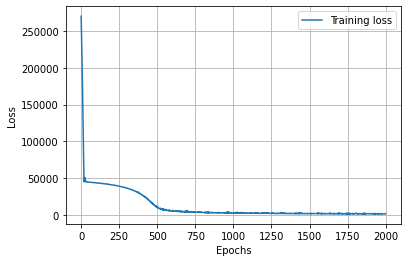

In [17]:
training_loss = history.history['loss']
plt.plot(training_loss, label='Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

### Load the testing dataset

In [5]:
X_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/asarmadi/summer_ml_s3/master/day05//fish_market_test_label.csv').values

In [24]:
yhat_test = model.predict(X_test)
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(yhat_test, y_test)
print ("Test MAE is", mae.result().numpy())

Test MAE is 23.73408


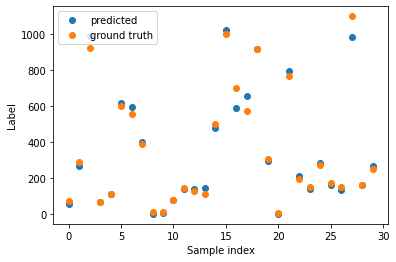

In [7]:
plt.figure()
plt.plot(yhat_test, 'o', label='predicted')
plt.plot(y_test, 'o', label='ground truth')
plt.legend()
plt.xlabel('Sample index')
plt.ylabel('Label')
plt.show()